# Major 4/5 Replacement Assignment
Please follow this template in implementing your solution for the take-home assignment. TAs will only consider the code provided in the `CODE CELL` to mark your work. The `TESTING CELL` is provided for your convenience (and to remind you to test your code periodically as you implement your solutions to the given problems!).

Remember to:
1. `Save and Checkpoint` often!
2. `Restart the kernel and Run all cells` to ensure that everything is working properly prior to submission.

Good Luck!
***

In [1]:
# name: Jason Liu
# macID: liuj321

## PROBLEM 1

### CODE CELL

In [2]:
# Start by importing pylab for graphing and math for various math functions
import pylab
import math

# Make a separate function for graphing, imports x and y values (first determined by XRD_Analysis)
def graph(x,y):
        
    # Simply plots and labels the graph
    pylab.title('Intensity vs 2θ')
    pylab.xlabel('2θ (deg.)')
    pylab.ylabel('Intensity (a.u.)')
    pylab.plot(x,y)
    pylab.show()
    
    return

# This function calculates the closest two leftmost data points to any specified value, in this case, the half maximum value
def closest_datapoints(x,y,halfpeaks,peakscenter):
    
    # Initializing several lists for calculations of the actual data
    # These two lists are used  to find the closest values above and below the half maximum value
    listupper = []
    listlower = []
    
    # Runs a for loop to find the closest data points for each half peak
    for i in range(len(halfpeaks)):
        
        # Initializing values for calculations
        # These values are used to determine the closest two data points above and below the half maximum value for each peak
        uppery = 100
        upperx = 0
        lowery = 0
        lowerx = 0
    
        # A nested for loop that checks every value in the data set
        for j in range(len(y)):
            # If statements to determine the above and below values
            # The data points must be very close to the peaks (distance < 1) to be counted
            # This is to prevent any other data point with similar intensity being accidentally calculated
            if y[j] > lowery and y[j] < halfpeaks[i] and x[j] < peakscenter[i] and (peakscenter[i] - x[j]) < 1:
                lowery = y[j]
                lowerx = x[j]
            if y[j] < uppery and y[j] > halfpeaks[i] and x[j] < peakscenter[i] and (peakscenter[i] - x[j]) < 1:
                uppery = y[j]
                upperx = x[j]
                
        # Stores the calculated values into lists to be used later
        listlower.append(lowerx)
        listlower.append(lowery)
        listupper.append(upperx)
        listupper.append(uppery)
    
    # Finally returns the two closest data points in two lists with the x value first followed by the y value, a list for the lower point and a list for the higher point
    return listlower, listupper

# This function calculates the average size given several values for full width at half maximum
# This function assumes the given full width half maximum value is in degrees
def calculate_average_size(wavelength, fwhm):
    
    # Initializes the variable to store the calculated average size
    size_average = 0
    
    # Runs a for loop that adds the calculation for the nanoparticle size to the average list using the given equation
    for i in range(len(fwhm)):
        # First converts the angle into radians
        fwhm[i] = fwhm[i]*(math.pi/180)
        # Adds each calculated nanoparticle size to the total average
        size_average += (0.9*wavelength)/(fwhm[i]*math.cos(fwhm[i]/2))
        
    # Divides by the total number of nanoparticle sizes to calculate the average size
    size_average = size_average/len(fwhm)
    
    # Returns the average size    
    return size_average

# Main function
def XRD_Analysis(file):
    
    # First opens and reads the file, storing it in a variable
    infile = open(file, 'r')
    data = infile.read()
    infile.close()
    data = data.split()
    # After closing the file, Splits the information so it is easier to read
    
    # Initializing variables (x is the x-axis on the graph, or 2𝜃 values, and y is the y-axis, or intensity values)
    x = []
    y = []
    # peaks represents the peak intensity values 
    peaks = []
    # peakscenter represents the x-values at each peak
    peakscenter = []
    # halfpeaks represents half the intensity of each peak
    halfpeaks = []
    
    # i is used as a counter for a while-loop
    i = 0
    while i != len(data):
        # This loop orders the data from the file into x and y values accordingly
        # It also remembers which values are peaks (have asterisks) and then removes the asterisks and converts it in floats to be used in calculations
        x.append(float(data[i]))
        if '*' in data[i+1]:
            y.append(float(data[i+1].replace('*', '')))
            peaks.append(float(data[i+1].replace('*', '')))
            halfpeaks.append(float(data[i+1].replace('*', ''))/2)
            peakscenter.append(float(data[i]))
        else:
            y.append(float(data[i+1]))
        i += 2
    
    # Now that the x and y values are sorted, run the graphing function with the x and y lists to create the graph
    graph(x,y)
    
    # Run the function to calculate the closest data points
    listlower, listupper = closest_datapoints(x,y,halfpeaks,peakscenter)
    
    # approximatex is used to store the approximate x value for each half maximum value on the left side of the graph
    # Only calculates leftmost points for simplicity and ease, then multiplies the value by 2 to find the full width half maximum
    approximatex = []
    # fwhm is the distance between the peakscenter and the approximatex value, initially in degrees
    fwhm = []
    wavelength = 0.07107
        
    # Initializes two variables, simply used to break the equation up to make it easier to calculate
    # The equation is the equation for linear interpolation rearranged to solve for an unknown x with two known coordinates and a known y value
    equationupper = 0
    equationlower = 0
        
    # Uses linear interpolation to find the approximate x value for each half peak
    for i in range(len(halfpeaks)):
        equationupper = (halfpeaks[i] - listlower[2*i+1])*(listupper[2*i]-listlower[2*i])
        equationlower = (listupper[2*i+1] - listlower[2*i+1])
        # Stores the approximate x value in the list
        approximatex.append((equationupper/equationlower) + listlower[2*i])
        # Calculates the distance between the peak center and the leftmost approximate x value, then multiplies by two for the full width half maximum value
        fwhm.append((peakscenter[i] - approximatex[i])*2)
    
    # Run the function to calculate the average size using the calculated values
    average = calculate_average_size(wavelength, fwhm)
    
    return average

### TESTING CELL

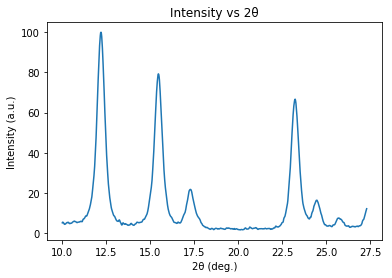

6.767615248360599

In [3]:
XRD_Analysis('XRD_example1.txt')

***

## PROBLEM 2

### CODE CELL

In [4]:
class Date:
    # Initializing the constructor with d, m, and y for day, month and year respectively
    def __init__(self, d, m, y):
        self.d = d
        self.m = m
        self.y = y
    
    # getDay method, which simply returns the day value
    def getDay(self):
        return self.d
    
    # getMonth method which returns the month value
    def getMonth(self):
        return self.m
    
    # Returns the year value
    def getYear(self):
        return self.y
        
    def Next(self):
        # Runs several conditional statements dependent on the day and month
        # If it is February the 28th, runs a second conditional statement
        if self.d == 28 and self.m == 2:
            # If it is February 28th and a leap year, go to February 29th
            if (self.y % 4 == 0) and (self.y % 100 != 0 or self.y % 400 == 0):
                self.d += 1
            # Otherwise, go to the next month and set the day to the 1st
            else:
                self.d = 1
                self.m += 1
        # If it is February 29th, go to the next month and set the day to the 1st
        elif self.d == 29 and self.m == 2:
                self.d = 1
                self.m += 1
        # If it is April, June, September, or November the 30th, go to the 1st of the next month
        elif self.d == 30 and (self.m == 4 or self.m == 6 or self.m == 9 or self.m == 11):
            self.d = 1
            self.m += 1
        # If it is the 31st of the other months, go to the first of the next month
        elif self.d == 31:
            self.d = 1
            self.m += 1
        # Otherwise, simply add one to the day
        else:
            self.d += 1
            
        # If the next month is after the twelfth month, set the date to the first month of the next year
        if self.m > 12:
            self.m = 1
            self.y += 1
            
        # Return the new date
        return self.d, self.m, self.y
    
    def Prev(self):
        # The same as Next(), but instead of checking if it is the last day of the month, check if it is the first day of the month
        # If it is March 1st, run a conditional statement
        if self.d == 1 and self.m == 3:
            # If it is a leap year, go to February 29th
            if (self.y % 4 == 0) and (self.y % 100 != 0 or self.y % 400 == 0):
                self.d = 29
                self.m -= 1
            # Otherwise go to February 28th
            else:
                self.d = 28
                self.m -= 1
        # If it is the 1st of a month directly after April, June, September, or November, set the date to the 30th of the previous month
        elif self.d == 1 and (self.m == 5 or self.m == 7 or self.m == 10 or self.m == 12):
            self.d = 30
            self.m -= 1
        # If it is the 1st of a month before any of the other months, set the date to the 31st of the previous month
        elif self.d == 1:
            self.d = 31
            self.m -= 1
        # Otherwise simply remove one from the day
        else:
            self.d -= 1
            
        # If the previous month is less than the first month, go to the 12th month of the previous year
        if self.m < 1:
            self.m = 12
            self.y -= 1
            
        # Return the new date
        return self.d, self.m, self.y
        
    def isBefore(self, d):
        # Run conditional statement to determine if the current date is before the date d
        # First simply checks if the current year is before d's year
        if (self.y < d.y):
            return True
        # If the current year is less than or equal to d's year, and the current month is less than or equal to d's month, the current date is before d
        elif (self.m < d.m) and (self.y <= d.y):
            return True
        # If both the current month and year are less than or equal to d's month and year, check if the current day is before d's day
        elif (self.d < d.d) and (self.m <= d.m) and (self.y <= d.y):
            return True
        # Otherwise the current date is not before d
        else:
            return False
        
    def isAfter(self, d):
        # Same as isBefore but checking if the current date is greater than d instead
        if (self.y > d.y):
            return True
        elif (self.m > d.m) and (self.y >= d.y):
            return True
        elif (self.d > d.d) and (self.m >= d.m) and (self.y >= d.y):
            return True
        else:
            return False
        
    def isEqual(self, d):
        # Checks if the year, month, and the days of the current date and d are the same
        if (self.y == d.y) and (self.m == d.m) and (self.d == d.d):
            return True
        else:
            return False
                
    def add_days(self, n):
        # Mandatory try-except statement to determine whether the value n inputted is valid
        try:
            # Runs a while loop for the value of n
            while n != 0:
                # Continuously goes to the next day for n amount of times
                self.Next()
                n -= 1
            # Returns the resultant date
            return self.d, self.m, self.y
        except:
            print('There was an error. Please check your value.')
            return
    
    def days_between(self, d):
        days = 0
        
        # Runs a while statement for while the two dates are not equal
        while (self.isEqual(d) != True):
            # Uses Next() or Prev() depending on whether the current date is before or after d respectively
            if self.isBefore(d) == True:
                self.Next()
            elif self.isAfter(d) == True:
                self.Prev()
            # days initialized at 0, adds on for every day when the dates are not equal
            days += 1
        
        # Returns the amount of days between both dates
        return days

### TESTING CELL

In [5]:
date1 = Date(20,3,2000)
date2 = Date(29,12,3021)

# date1.Next()
# date1.Prev()

# print(date1.getDay())
# print(date1.getMonth())
# print(date1.getYear())

# date1.isBefore(date2)
# date1.isAfter(date2)
# date1.isEqual(date2)

date1.add_days(99999)
# date1.days_between(date2)

(2, 1, 2274)

***

## Extra Practice Cells (note that TAs will not consider the cells below when marking)